## RNN - Bidirectional  

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import os

import keras
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [9]:
from keras.datasets import imdb

In [12]:
max_features = 10000
maxlen = 500 

In [14]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [15]:
word_index = imdb.get_word_index()

In [16]:
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [17]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [18]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
hist=model.fit(x_train, y_train,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.4853 - acc: 0.7700 - val_loss: 0.3775 - val_acc: 0.8584
Epoch 2/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.3100 - acc: 0.8810 - val_loss: 0.4559 - val_acc: 0.7930
Epoch 3/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.2617 - acc: 0.9032 - val_loss: 0.3168 - val_acc: 0.8702
Epoch 4/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.2179 - acc: 0.9204 - val_loss: 0.4696 - val_acc: 0.8568
Epoch 5/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.1888 - acc: 0.9329 - val_loss: 0.3541 - val_acc: 0.8600
Epoch 6/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.1742 - acc: 0.9395 - val_loss: 0.4285 - val_acc: 0.8730
Epoch 7/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.1582 - acc: 0.9443 - val_loss: 0.4287 - v

In [21]:
from myutils import *

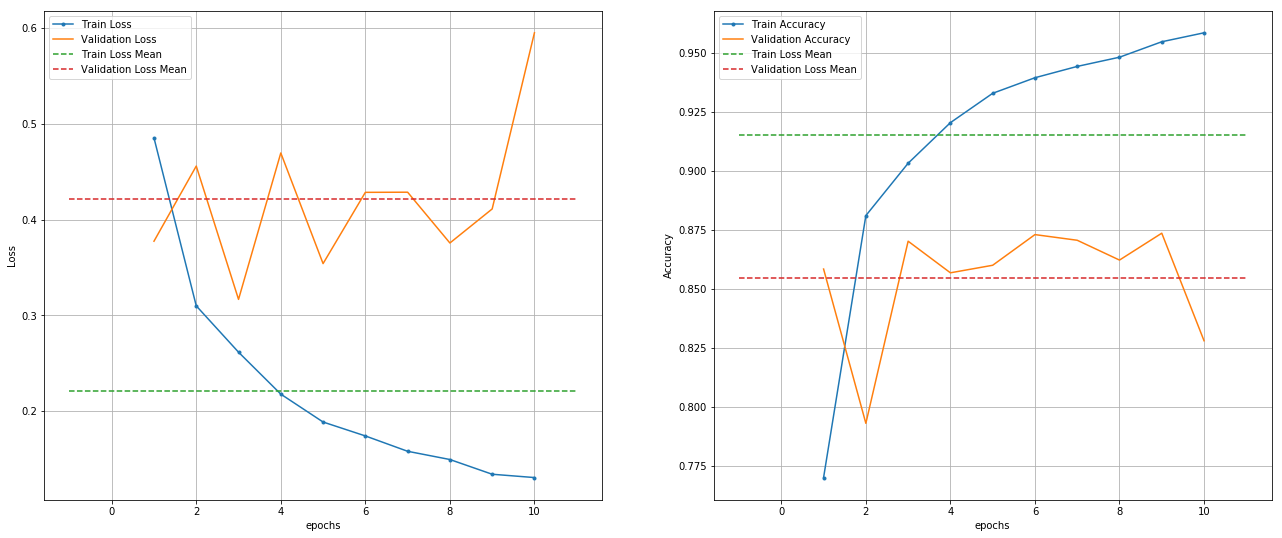

In [23]:
plot_keras_acc_ax(hist)

## Using a Bidirectional layer

In [24]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist_bi = model.fit(x_train, y_train,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 219s 11ms/step - loss: 0.5306 - acc: 0.7399 - val_loss: 0.5799 - val_acc: 0.7038
Epoch 2/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.3352 - acc: 0.8683 - val_loss: 0.3400 - val_acc: 0.8764
Epoch 3/10
20000/20000 [==============================] - 242s 12ms/step - loss: 0.2699 - acc: 0.8997 - val_loss: 0.3456 - val_acc: 0.8726
Epoch 4/10
20000/20000 [==============================] - 243s 12ms/step - loss: 0.2259 - acc: 0.9174 - val_loss: 0.3509 - val_acc: 0.8580
Epoch 5/10
20000/20000 [==============================] - 215s 11ms/step - loss: 0.2064 - acc: 0.9270 - val_loss: 0.4081 - val_acc: 0.8790
Epoch 6/10
20000/20000 [==============================] - 203s 10ms/step - loss: 0.1799 - acc: 0.9376 - val_loss: 0.6265 - val_acc: 0.7996
Epoch 7/10
20000/20000 [==============================] - 226s 11ms/step - loss: 0.1685 - acc: 0.9438 - val_loss: 0.4

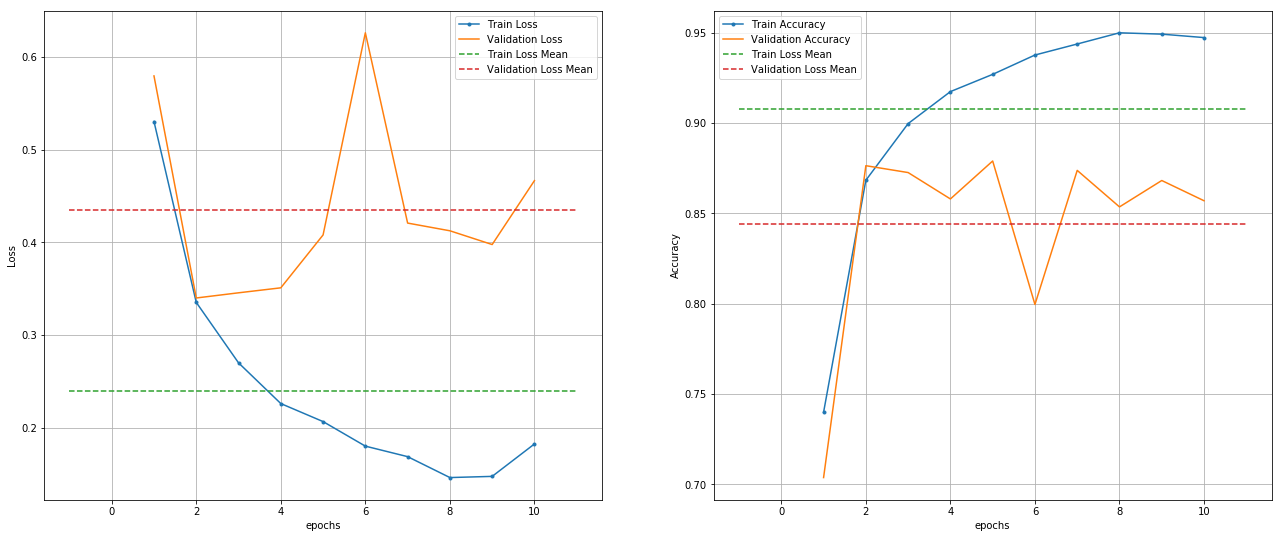

In [26]:
plot_keras_acc_ax(hist_bi)